### Simulation model

Take true model

$$y_i=\beta x_i$$

$\vec{X} is a sample of observed variables and \vec{Y} is a response variable to that sample.

We want to compare two models:

$$y_i=\beta_0 + \beta_1 x_i + \epsilon_i$$

and

$$y_i=\beta x_i + \epsilon_i$$

We assume that $$y_i \sim \mathcal{N}(\beta_0+\beta_1 x_i, \sigma ^2)$$


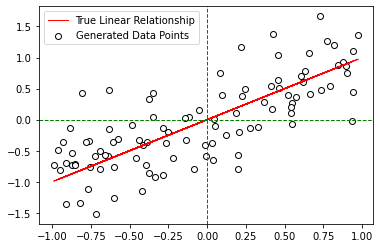

In [49]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

num_samples = 100  # number of sample points

#X = np.linspace(0, 1, num_samples) * 2 - 1
X = np.random.rand(num_samples) * 2 - 1

sigma = 0.5
beta =  1 # true slope
beta_0 = 0.005
noise = np.random.normal(0, sigma, num_samples)  # standard normal noise term

y = beta * X + noise + beta_0


plt.plot(
    X, beta * X, color='red', 
    linewidth=1, label='True Linear Relationship'
    )
plt.scatter(
    X, y, color='white', edgecolor='black', 
    marker='o', label='Generated Data Points'
    )
plt.legend()

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')

plt.title('')
plt.show()

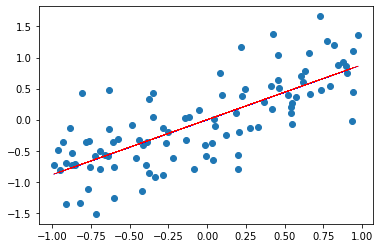

In [50]:
from sklearn.linear_model import LinearRegression
from linear_regression import linear_regression


X = X.reshape(-1, 1)  # values converts it into a numpy array
y = y.reshape(-1, 1)

Y_pred = linear_regression(X, y)

Y_pred_no = linear_regression(X, y, intercept=False)


plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue', linewidth=0.5)
plt.plot(X, Y_pred_no, color='red', linewidth=0.5)
plt.show()

We wish to compare Akaike Information Criterion and Bayesian Information Criterion of two models to check goodness of fit. 

The formula is

$$
BIC=n \log(2 \pi \sigma^2)+ \frac{\sum (y_i-\hat{y})^2}{\sigma^2}+k\log n
$$

$$
AIC = n \log(2 \pi \sigma^2)+ \frac{\sum (y_i-\hat{y})^2}{\sigma^2}+ 2k
$$

In [51]:
from linear_regression import (bayesian_information_criterion,
                               akaike_information_criterion)

BIC = bayesian_information_criterion(y, Y_pred, num_samples, sigma, 3)
BIC_no = bayesian_information_criterion(y, Y_pred_no, num_samples, sigma, 2)

AIC = akaike_information_criterion(y, Y_pred, num_samples, sigma, 3)
AIC_no = akaike_information_criterion(y, Y_pred_no, num_samples, sigma, 2)

print(f"BIC of intercept model is {BIC: >22}")
print(f"BIC of no-intercept model is {BIC_no: >19}")
print(f"AIC of intercept model is {AIC: >22}")
print(f"AIC of no-intercept model is {AIC_no: >19}")



BIC of intercept model is     1108.5106436369174
BIC of no-intercept model is  1103.8918427055673
AIC of intercept model is     1100.6951330789532
AIC of no-intercept model is  1098.6815023335912


We will compare two regression models:

One is with intercept term and the other one is a no-intercept

$$
\hat{\beta_1} = \frac{S_{xy}}{S_{xx}}
$$

$$
S_{xy} = \sum (x_i- \bar{x})y_i
$$

$$
S_{xx} = \sum (x_i- \bar{x})^2
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x} 
$$

$$
\hat{\beta} = \frac{\sum x_i y_i}{\sum x_i^2}
$$

In [52]:
mean_x = np.average(X)
mean_y = np.average(y)

Sxx = np.sum((X-mean_x)**2)
Sxy = np.sum((X-mean_x)*y)


beta_1_hat = Sxy/Sxx
beta_0_hat = mean_y - beta_1_hat * mean_x

beta_hat = np.sum(X*y)/np.sum(X**2) 

print(beta_hat)
print(beta_1_hat)
print(beta_0_hat)

0.885460199315365
0.8850566932192419
-0.002395228007383919


Let's plot regression lines:


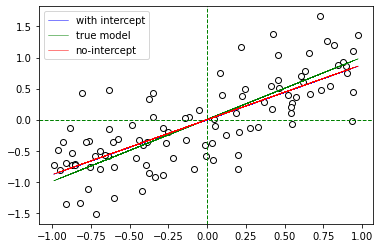

In [53]:
plt.scatter(X, y, color='white', edgecolor='black', marker='o')

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')


plt.plot(X, beta_1_hat * X + beta_0_hat, color='blue', linewidth=0.5, label='with intercept')
plt.plot(X, beta * X + beta_0, color='green', linewidth=0.5, label='true model')
plt.plot(X, beta_hat * X, color='red', linewidth=0.5, label='no-intercept')

plt.legend()

Zoom a little bit...

(-0.5, 0.5)

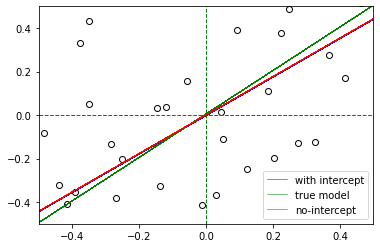

In [54]:
plt.scatter(X, y, color='white', edgecolor='black', marker='o')

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')

plt.plot(X, beta_1_hat * X + beta_0_hat, color='blue', linewidth=0.5, label='with intercept')
plt.plot(X, beta * X + beta_0, color='green', linewidth=0.5, label='true model')
plt.plot(X, beta_hat * X, color='red', linewidth=0.5, label='no-intercept')

plt.legend()

plt.xlim(-0.5, 0.5) 
plt.ylim(-0.5, 0.5)  


Let's compare sum of squares of differences between fitted response values and true response values of two models and call the value $SS_{dev}$, or sum of square deviations (from true model), or $SSD$.
($SS_{dev} = \sum (y_i-\hat{y_i})^2$)

In [55]:
y_hat = beta_1_hat * X + beta_0_hat  # intercept model response variable
y_hat_hat = beta_hat * X  # no-intercept response variable


y = beta * X + beta_0

SS_dev_intercept = np.sum((y-y_hat)**2)
SS_dev_no_intercept = np.sum((y-y_hat_hat)**2)

print(f"SSD of intercept model: {SS_dev_intercept}")
print(f"SSD of no-intercept model: {SS_dev_no_intercept}")

SSD of intercept model: 0.46305539852212607
SSD of no-intercept model: 0.4601162872949755


### Same calculations but many times

In [56]:
SS_dev_intercept_mean = 0
SS_dev_no_intercept_mean = 0


SSD_sum = 0  # counts how many times no intercept model was better in terms of SSD
BIC_sum = 0
AIC_sum = 0

num_samples = 1000
X = np.random.rand(num_samples) * 2 - 1

for i in range(1000):

    beta =  1  # true slope
    beta_0 = 0.005
    sigma = 1
    noise = np.random.normal(0, sigma, num_samples)  # standard normal noise term

    y = beta * X + noise + beta_0

    mean_x = np.average(X)
    mean_y = np.average(y)

    Sxx = np.sum((X-mean_x)**2)
    Sxy = np.sum((X-mean_x)*y)


    beta_1_hat = Sxy/Sxx
    beta_0_hat = mean_y - beta_1_hat * mean_x

    beta_hat = np.sum(X*y)/np.sum(X**2)


    y_hat = linear_regression(X, y)  # intercept model response variable
    y_hat_hat = linear_regression(X, y, intercept=False)  # no-intercept response variable
    
    BIC_no = bayesian_information_criterion(y, y_hat_hat, num_samples, sigma, k=2)
    BIC = bayesian_information_criterion(y, y_hat, num_samples, sigma, k=3)
    
    AIC = akaike_information_criterion(y, Y_pred, num_samples, sigma, 3)
    AIC_no = akaike_information_criterion(y, Y_pred_no, num_samples, sigma, 2)

    
    
    if BIC_no < BIC:
        BIC_sum += 1

    if AIC_no < AIC:
        AIC_sum += 1

    y_true = beta * X + beta_0

    SS_dev_intercept = np.sum((y_true-y_hat)**2)
    SS_dev_no_intercept = np.sum((y_true-y_hat_hat)**2)

    
    if SS_dev_no_intercept < SS_dev_intercept:
        SSD_sum += 1
        
    
    SS_dev_intercept_mean += SS_dev_intercept
    SS_dev_no_intercept_mean += SS_dev_no_intercept
    
print(num_samples*(beta_0**2)-(beta_0**2)*(num_samples**2)*
      (mean_x**2)/np.sum(X**2)+1+np.sum(X**2)*(beta-beta**2))
print((np.sum(X**2)/ num_samples+np.sum(X**2)-2*num_samples*mean_x**2)/np.sum((X-mean_x)**2))
print(SS_dev_intercept_mean/10000)
print(SS_dev_no_intercept_mean/10000)
print(f"Absolute frequency of how many times " 
      f"no-intercept model showed lower SSD: {SSD_sum}")
print(f"Absolute frequency of how many times " 
      f"no-intercept model showed lower BIC: {BIC_sum}")
print(f"Absolute frequency of how many times "
      f"no-intercept model showed lower AIC: {AIC_sum}")

1.024997471419058
1.0008989476847967
69386.56630485339
69288.01951596576
Absolute frequency of how many times no-intercept model showed lower SSD: 739
Absolute frequency of how many times no-intercept model showed lower BIC: 962
Absolute frequency of how many times no-intercept model showed lower AIC: 421


#### Find interesting values for variance and intercept term

Find values for variance and intercept term, when BIC and SSD will be equal in two models.

It is hard to check the exact equality since we have to account for randomness of data, but we can get close enough by making a lot of simulations and then taking the average of the statistics that we want to estimate, in our case SSD and BIC

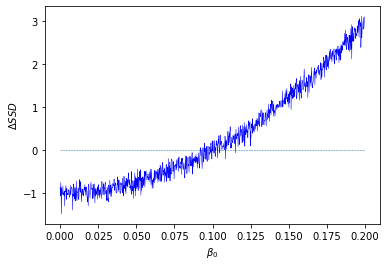

In [57]:
delta_SSD = np.zeros(1000)
delta_AIC = np.zeros(1000)
delta_BIC = np.zeros(1000)
alphas = np.zeros(1000)

np.random.seed(42)

for increment in range(1000):
    SS_dev_intercept_mean = 0
    SS_dev_no_intercept_mean = 0
    num_samples = 100 
    for i in range(100):

        beta =  1  # true slope
        beta_0 = 0 + increment/5000
        noise = np.random.normal(0, 1, num_samples)  # standard normal noise term
        X = np.random.rand(num_samples) * 2 - 1
        y = beta * X + noise + beta_0

        mean_x = np.average(X)
        mean_y = np.average(y)

        Sxx = np.sum((X-mean_x)**2)
        Sxy = np.sum((X-mean_x)*(y))


        beta_1_hat = Sxy/Sxx
        beta_0_hat = mean_y - beta_1_hat * mean_x

        beta_hat = np.sum(X*y)/np.sum(X**2)

        # y_hat = linear_regression(X, y)
        # y_hat_hat = linear_regression(X,y, False)

        y_hat = beta_1_hat * X + beta_0_hat  # intercept model response variable
        y_hat_hat = beta_hat * X  # no-intercept response variable

        y_true = beta * X + beta_0

        SS_dev_intercept = np.sum((y_true-y_hat)**2)
        SS_dev_no_intercept = np.sum((y_true-y_hat_hat)**2)

        SS_dev_intercept_mean += SS_dev_intercept
        SS_dev_no_intercept_mean += SS_dev_no_intercept

    SS_dev_intercept_mean /= 100
    SS_dev_no_intercept_mean /= 100

    delta_SSD[increment] = SS_dev_no_intercept_mean - SS_dev_intercept_mean
    alphas[increment] = beta_0

zeros = np.zeros_like(alphas)

plt.plot(alphas, zeros, '--', linewidth=0.5)
plt.plot(alphas, delta_SSD, color='blue', linewidth=0.5)

plt.xlabel(r"$\beta_0$")
plt.ylabel(r"$\Delta SSD$")
plt.show()


While as $\alpha$ grows we clearly see that the full model becomes better fit, however at a very small values of $\alpha$ no-intercept model performs better on average

In [58]:
for i in range(1000):

    beta =  1  # true slope
    beta_0 = 0 + increment/5000
    noise = np.random.normal(0, 1, num_samples)  # standard normal noise term
    X = np.random.rand(num_samples) * 2 - 1
    y = beta * X + noise + beta_0

    mean_x = np.average(X)
    mean_y = np.average(y)

    Sxx = np.sum((X-mean_x)**2)
    Sxy = np.sum((X-mean_x)*(y))


    beta_1_hat = Sxy/Sxx
    beta_0_hat = mean_y - beta_1_hat * mean_x

    beta_hat = np.sum(X*y)/np.sum(X**2)

    